In [1]:
import pandas as pd

In [2]:
import numpy as np 

In [3]:
import matplotlib.pyplot as plt

In [5]:
import sklearn

In [6]:
from sklearn.datasets import load_digits

In [7]:
df = load_digits()

In [14]:
df.images,df.target

(array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
         [ 0.,  0.,  3., ..., 14.,  0.,  0.],
         [ 0.,  0.,  8., ..., 16.,  0.,  0.],
         ...,
         [ 0.,  9., 16., ...,  0.,  0.,  0.],
         [ 0.,  3., 13., ..., 11.,  5.,  0.],
         [ 0.,  0.,  0., ..., 16.,  9.,  0.]],
 
        ...,
 
        [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ...,  2.,  1.,  0.],
         [ 0.,

2

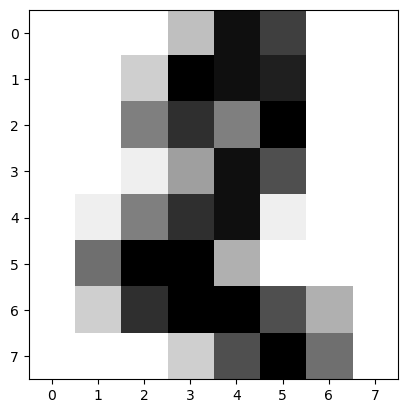

In [24]:
plt.imshow(df.images[2], cmap=plt.cm.gray_r, interpolation= "nearest")
df.target[2]

In [28]:
type(df.images[0])

numpy.ndarray

In [29]:
df.images[0].shape

(8, 8)

In [30]:
df.images.shape

(1797, 8, 8)

In [31]:
n = len(df.images)
n

1797

In [33]:
df.images = df.images.reshape(n,-1)

In [34]:
df.images.shape

(1797, 64)

In [35]:
df.images

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

# scaling the image

In [39]:
df.images.max(), df.images.min()

(16.0, 0.0)

In [40]:
df.images = df.images/16

In [41]:
df.images.max()

1.0

In [42]:
df.images

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

# train test split

In [44]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(df.images,df.target, train_size=.9, random_state=42)

In [49]:
x_train

array([[0.    , 0.    , 0.8125, ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.0625, ..., 0.4375, 0.    , 0.    ],
       [0.    , 0.    , 0.1875, ..., 0.75  , 0.25  , 0.    ],
       ...,
       [0.    , 0.    , 0.5625, ..., 1.    , 0.125 , 0.    ],
       [0.    , 0.    , 0.0625, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.0625, ..., 0.0625, 0.    , 0.    ]])

In [74]:
x_test.shape , [ i for i in y_test if i==1]

((180, 64), [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# using random forest model

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
model = RandomForestClassifier()

In [53]:
model

RandomForestClassifier()

In [54]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [55]:
predicted = model.predict(x_test)


7


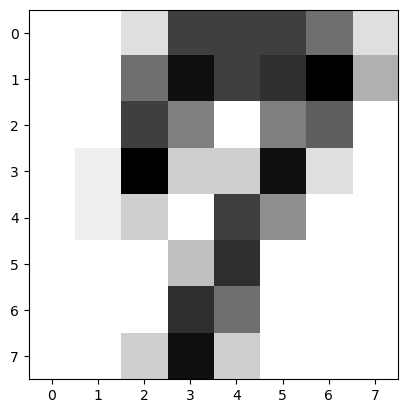

In [67]:
plt.imshow(x_test[3].reshape(8,8), cmap=plt.cm.gray_r, interpolation="nearest")
print(predicted[3])

In [68]:
from sklearn.metrics import confusion_matrix, classification_report

In [69]:
confusion_matrix(y_test, predicted)

array([[16,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 17,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 16,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 25,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 22,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 19,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 18,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 24]])

In [71]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        17
           3       1.00      0.94      0.97        17
           4       0.96      1.00      0.98        25
           5       0.96      1.00      0.98        22
           6       1.00      1.00      1.00        19
           7       0.95      0.95      0.95        19
           8       1.00      1.00      1.00         8
           9       0.96      0.96      0.96        25

    accuracy                           0.98       180
   macro avg       0.98      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180

